### 필수과제 2
- NH고객데이터의 군집에 대한 평가를 진행 후 적정 군집에 대한 기준을 선정해 주세요.(필수)
- 모든 변수를 다 사용해도 되고, 피처에대한 중요성을 확인해서 변수를 먼저 추출하고 난 후에 진행도 됩니다. ( 피처에 대한 중요도는 자율로 진행해 주세요! )
- 오늘 배운 군집화를 진행하는 과정에서의 근기들은 꼭 다 코드로 작성 해주셔야 합니다.(필수)

- 필수적으로 공유해야 하는 것 (필수)
- 1. 군집의 개수를 선정한 기준에 대한 설명 및 코드 ( 주석 필수 )
- 2. 해당 군집에 대한 특성 비교 
- 3. 군집에 대한 인사이트를 통해서 마케팅이건, 세일즈건 어떤 전략을 펼칠 수 있는지? 
- ( 단순하게 나열 형식으로 투자성향이 높은 사람은 무엇을 해야 한다 이런 식보다는 좀 더 데이터 근거 + 외부나 비정형데이터를 통해서 같이 전략을 제안하는 것) 

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# 고객 데이터 읽기
client = pd.read_csv("NH거래고객데이터.csv")

In [3]:
client

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [4]:
# 컬럼 정보 확인
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [5]:
client.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [6]:
client.drop(client[client.투자성향 == "99"].index)

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [7]:
# 분석에 사용할 수 없는 컬럼 제거
client = client[['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군', 
                 'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분']]

### 분석 진행 과정
 - 평가를 진행하여 적절한 k값을 찾은 후 모든 컬럼을 사용하여 K-means 진행
 - 해당 군집에 대한 특성 비교
 - 마케팅 인사이트 제시

### 전체 데이터 평가

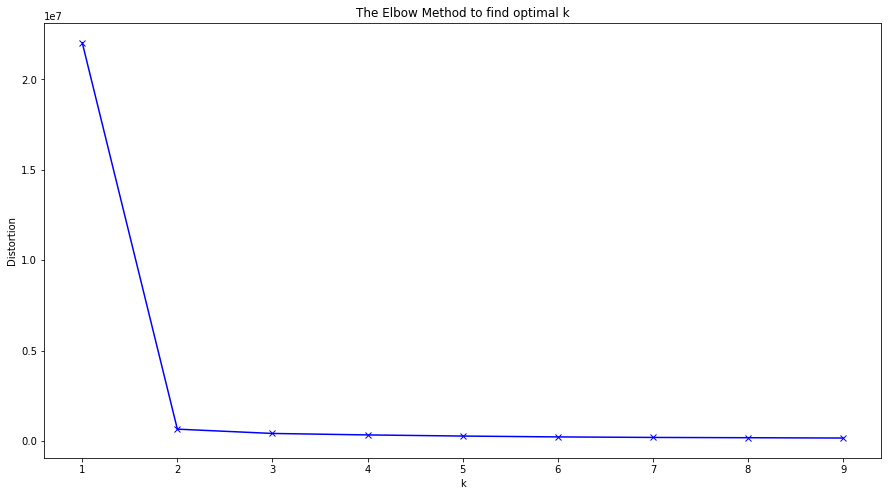

In [8]:
# 모든 컬럼을 사용, Elbow method
# Elbow method
dist = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(client)
    dist.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,10), dist, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method to find optimal k")
plt.show()

In [9]:
# 모든 컬럼을 사용, Silhouette Score
from sklearn.metrics import silhouette_score

sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(client)
    ss = silhouette_score(client, kmeans.labels_)
    sil.append(ss)
    print("Silhouette Score for k=" + str(k) + ":", round(ss, 4))

Silhouette Score for k=2: 0.914
Silhouette Score for k=3: 0.9178
Silhouette Score for k=4: 0.917
Silhouette Score for k=5: 0.5092
Silhouette Score for k=6: 0.2941
Silhouette Score for k=7: 0.2811
Silhouette Score for k=8: 0.2727
Silhouette Score for k=9: 0.2585


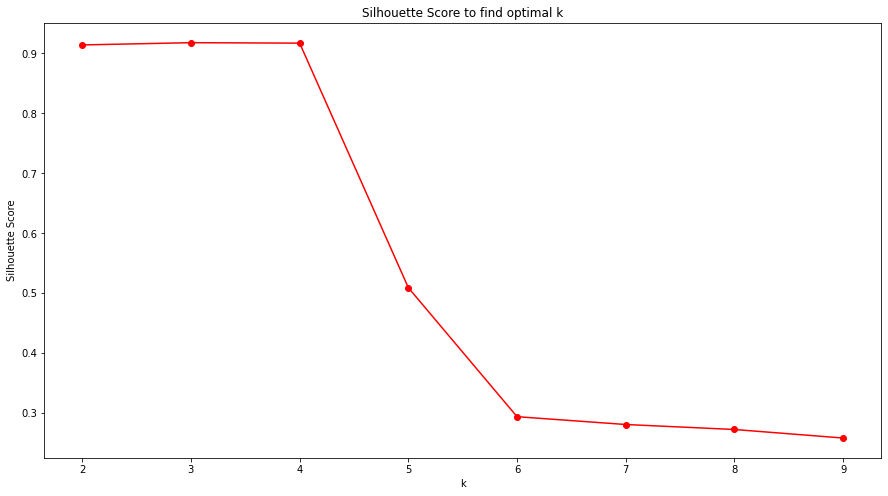

In [10]:
plt.figure(figsize=(15,8))
plt.plot(range(2,10), sil, "ro-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to find optimal k")
plt.show()

- Elbow method에서 k=2일 때 optimal하다.
- Silhouette score는 k=2, 3일 때 높게 나타난다.
- 그러므로 k=2인 K-means를 진행

### 전체 데이터 K-means 진행

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=111)

In [12]:
kmeans

KMeans(n_clusters=2, random_state=111)

In [13]:
# 모든 컬럼을 사용, K-means 진행
kmeans.fit(client)

client_all = client
client_all["cluster"] = kmeans.labels_

C:\Users\doram\AppData\Local\Temp\ipykernel_10556\1907903010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_all["cluster"] = kmeans.labels_


In [14]:
# 생성된 클러스터 확인
client_all.cluster.value_counts().to_frame()

,cluster
0,6313
1,3687


In [15]:
# 컬럼별 클러스터 차이 확인
for i in list(client_all.columns):
    print('-----------------',i ,'mean 비교')
    print(client_all.groupby(['cluster'])[i].mean())

----------------- 성별 mean 비교
cluster
0    1.355299
1    1.480608
Name: 성별, dtype: float64
----------------- 연령구간 mean 비교
cluster
0    4.47220
1    5.04204
Name: 연령구간, dtype: float64
----------------- 투자성향 mean 비교
cluster
0     3.213211
1    99.000000
Name: 투자성향, dtype: float64
----------------- 고객자산구간 mean 비교
cluster
0    2.580706
1    2.174939
Name: 고객자산구간, dtype: float64
----------------- 주거래상품군 mean 비교
cluster
0    2.090765
1    2.002441
Name: 주거래상품군, dtype: float64
----------------- LIFESTAGE mean 비교
cluster
0    4.268018
1    4.795498
Name: LIFESTAGE, dtype: float64
----------------- 고객등급 mean 비교
cluster
0    5.644385
1    6.855438
Name: 고객등급, dtype: float64
----------------- 총투자기간 mean 비교
cluster
0    2.762078
1    2.545159
Name: 총투자기간, dtype: float64
----------------- 주거래업종구분 mean 비교
cluster
0    10.248535
1    10.713046
Name: 주거래업종구분, dtype: float64
----------------- cluster mean 비교
cluster
0    0.0
1    1.0
Name: cluster, dtype: float64


### 군집 데이터 시각화

In [16]:
# 한글 폰트 코드
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

platform.system() == 'Windows'
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [17]:
client_all.query("cluster == 0")

,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분,cluster
1,1,6,4,4,2,5,2,6,1,0
2,2,7,4,3,2,5,5,6,9,0
3,2,6,4,4,8,5,3,6,16,0
4,1,5,2,2,2,5,5,5,16,0
5,1,5,3,4,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...
9994,1,5,3,1,2,7,9,2,16,0
9995,1,9,4,2,2,9,5,2,16,0
9996,2,2,3,1,2,2,9,1,16,0
9997,2,7,4,2,2,5,5,2,16,0


<AxesSubplot:xlabel='성별', ylabel='count'>

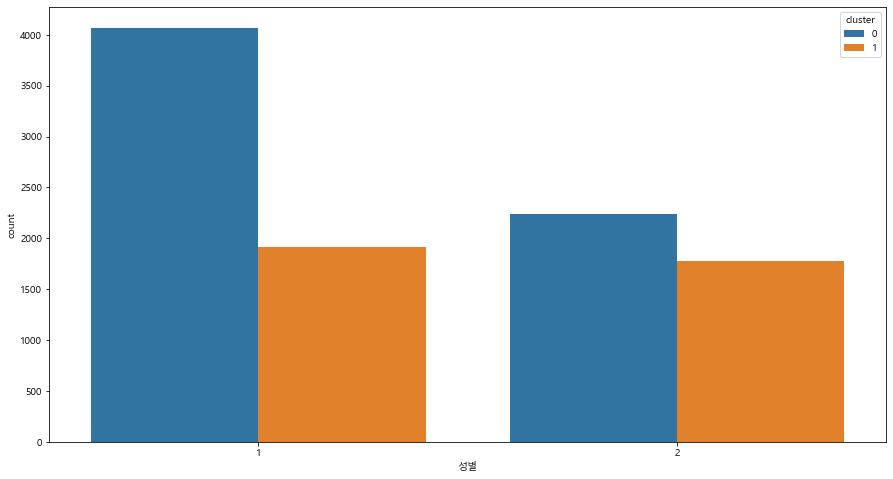

In [19]:
# cluster별 성별 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="성별", hue="cluster", data=client_all)

In [32]:
client_all.groupby("cluster").성별.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 성별          
0       1   0.644701
        2   0.355299
1       1   0.519392
        2   0.480608

<AxesSubplot:xlabel='연령구간', ylabel='count'>

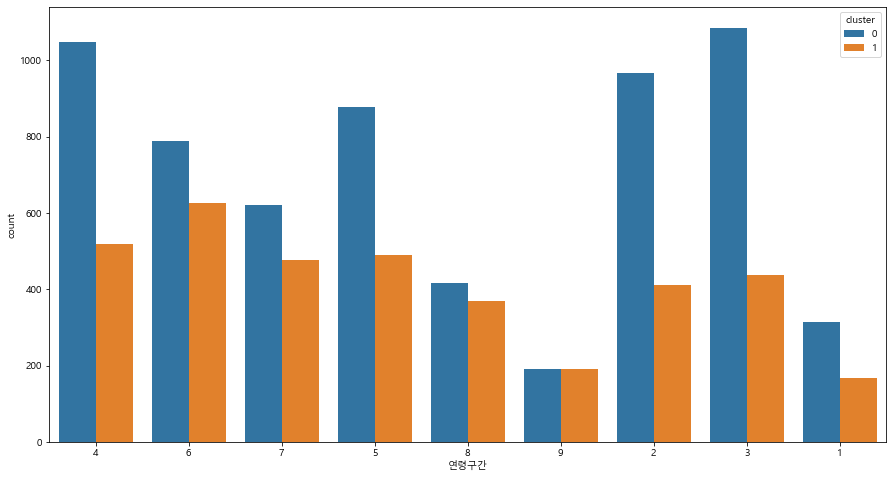

In [20]:
# cluster별 연령구간 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="연령구간", hue="cluster", data=client_all)

In [31]:
client_all.groupby("cluster").연령구간.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 연령구간          
0       1     0.049739
        2     0.153176
        3     0.172026
        4     0.166007
        5     0.139236
        6     0.125139
        7     0.098527
        8     0.066054
        9     0.030097
1       1     0.045294
        2     0.111473
        3     0.118796
        4     0.140765
        5     0.132899
        6     0.169515
        7     0.129102
        8     0.100353
        9     0.051804

<AxesSubplot:xlabel='투자성향', ylabel='count'>

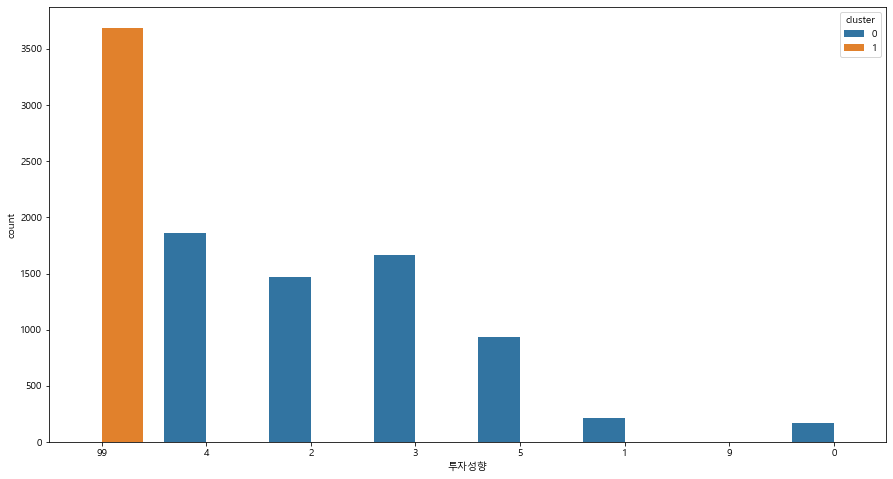

In [21]:
# cluster별 투자성향 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="투자성향", hue="cluster", data=client_all)

In [36]:
client_all.groupby("cluster").투자성향.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 투자성향          
0       0     0.027087
        1     0.033265
        2     0.232378
        3     0.264375
        4     0.294313
        5     0.148107
        9     0.000475
1       99    1.000000

<AxesSubplot:xlabel='고객자산구간', ylabel='count'>

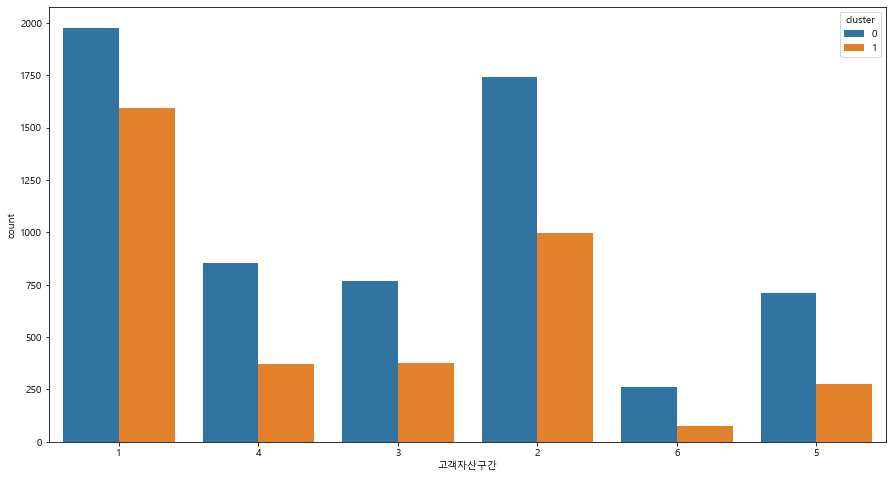

In [22]:
# cluster별 고객자산구간 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="고객자산구간", hue="cluster", data=client_all)

In [37]:
client_all.groupby("cluster").고객자산구간.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 고객자산구간          
0       1       0.313322
        2       0.276097
        3       0.121971
        4       0.134960
        5       0.112466
        6       0.041185
1       1       0.432330
        2       0.270410
        3       0.102251
        4       0.100353
        5       0.074315
        6       0.020342

<AxesSubplot:xlabel='주거래상품군', ylabel='count'>

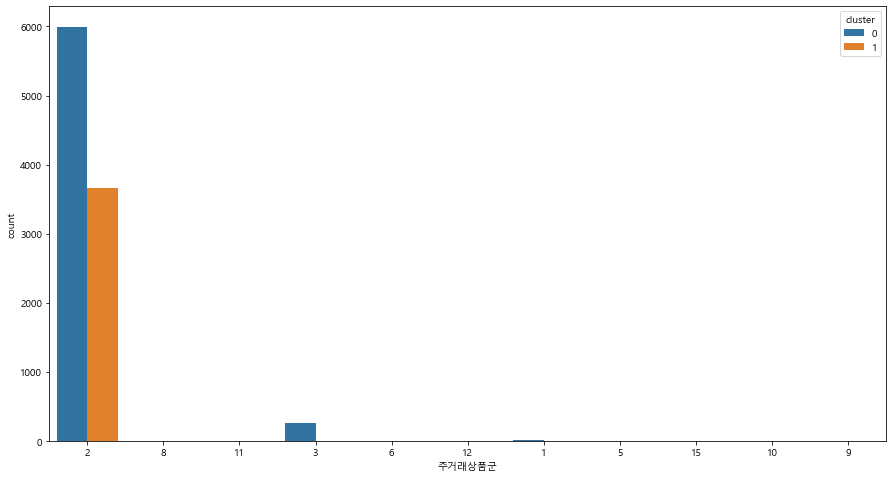

In [23]:
# cluster별 주거래상품군 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="주거래상품군", hue="cluster", data=client_all)

In [38]:
client_all.groupby("cluster").주거래상품군.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 주거래상품군          
0       1       0.003643
        2       0.948677
        3       0.041026
        5       0.000792
        6       0.000317
        8       0.001267
        9       0.000792
        10      0.001267
        11      0.000475
        12      0.000158
        15      0.001584
1       1       0.002983
        2       0.995389
        3       0.000542
        5       0.000542
        6       0.000271
        10      0.000271

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

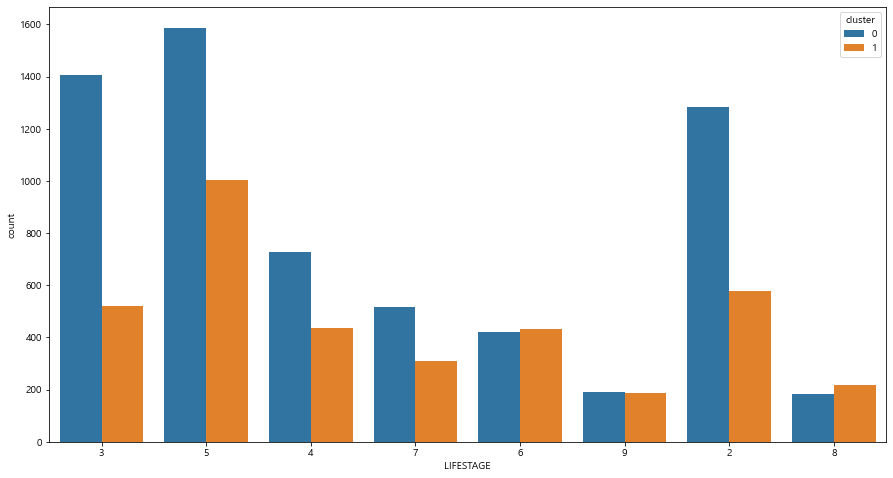

In [24]:
# cluster별 LIFESTAGE 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="LIFESTAGE", hue="cluster", data=client_all)

In [39]:
client_all.groupby("cluster").LIFESTAGE.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster LIFESTAGE          
0       2          0.203073
        3          0.222557
        4          0.115318
        5          0.251544
        6          0.066529
        7          0.081895
        8          0.028988
        9          0.030097
1       2          0.156767
        3          0.141307
        4          0.118253
        5          0.272579
        6          0.116897
        7          0.084079
        8          0.058855
        9          0.051261

<AxesSubplot:xlabel='고객등급', ylabel='count'>

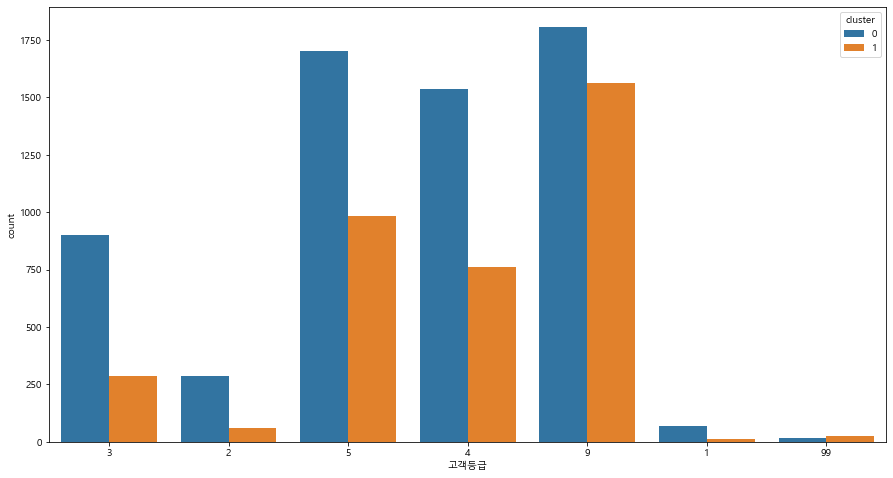

In [25]:
# cluster별 고객등급 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="고객등급", hue="cluster", data=client_all)

In [40]:
client_all.groupby("cluster").고객등급.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 고객등급          
0       1     0.011088
        2     0.044987
        3     0.142563
        4     0.243307
        5     0.269919
        9     0.285918
        99    0.002218
1       1     0.003526
        2     0.016545
        3     0.077027
        4     0.206672
        5     0.266612
        9     0.423379
        99    0.006238

<AxesSubplot:xlabel='총투자기간', ylabel='count'>

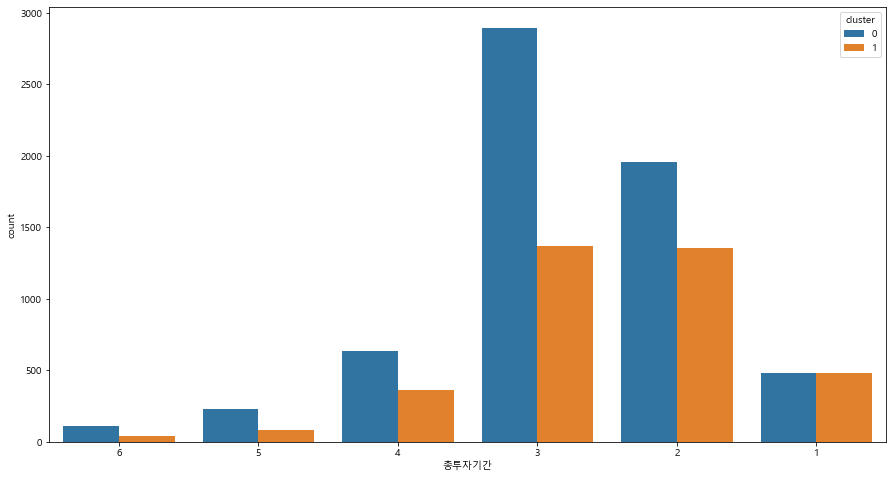

In [26]:
# cluster별 총투자기간 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="총투자기간", hue="cluster", data=client_all)

In [41]:
client_all.groupby("cluster").총투자기간.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 총투자기간          
0       1      0.076667
        2      0.310154
        3      0.459053
        4      0.100111
        5      0.036591
        6      0.017424
1       1      0.129645
        2      0.368050
        3      0.372389
        4      0.097640
        5      0.021969
        6      0.010306

<AxesSubplot:xlabel='주거래업종구분', ylabel='count'>

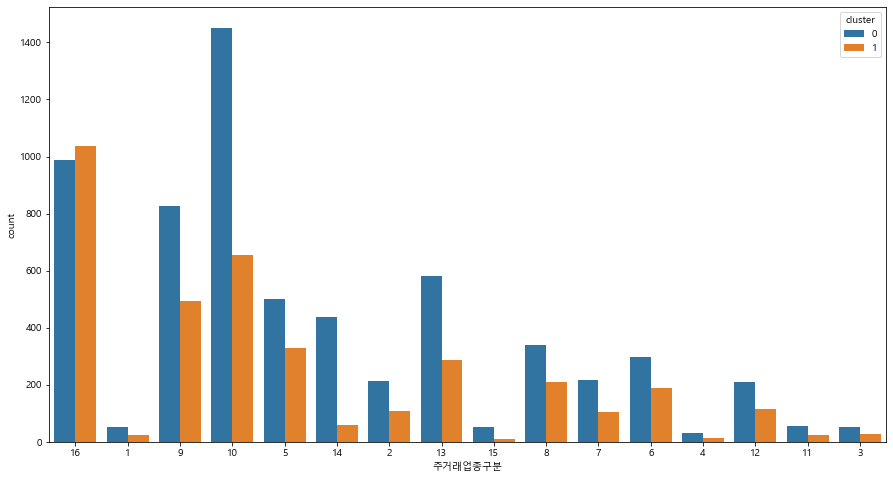

In [27]:
# cluster별 주거래업종구분 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="주거래업종구분", hue="cluster", data=client_all)

In [42]:
client_all.groupby("cluster").주거래업종구분.value_counts(normalize=True).rename("prop").sort_index().to_frame()

prop
cluster 주거래업종구분          
0       1        0.008079
        2        0.034057
        3        0.008079
        4        0.005069
        5        0.079518
        6        0.047363
        7        0.034532
        8        0.054016
        9        0.130841
        10       0.229843
        11       0.009029
        12       0.033265
        13       0.092032
        14       0.069381
        15       0.008395
        16       0.156502
1       1        0.006509
        2        0.029021
        3        0.007594
        4        0.003797
        5        0.089232
        6        0.051261
        7        0.028750
        8        0.056686
        9        0.133984
        10       0.177922
        11       0.007052
        12       0.031191
        13       0.077570
        14       0.015731
        15       0.002712
        16       0.280987

### 군집 비교
- cluster는 투자성향의 결측치 여부를 기준으로 진행되었음을 확인할 수 있다. (0:결측치 X, 1:결측치 O)
- 0번 군집에서는 남성의 비율이 높은 반면, 1번 군집에서는 남녀 비율이 크게 차이나지 않는다.
- 0번 군집에서는 25 ~ 45세(연령구간 2,3,4,5)의 비율이 비교적 높다.
- 0번 군집의 투자기간이 상대적으로 더 긴 것으로 보인다.
- 0번과 1번 모두 국내주식을 주로 거래하였고, 0번 군집에서는 해외주식을 주로 거래하는 고객들이 약 4%정도 있다.
- 0번 군집에서 제조업에 관한 거래가 상당히 많았고, 1번 군집에서는 매매를 하지 않은 경우가 상대적으로 많았다.

### 인사이트 도출
- 표면적으로 K-means를 통해서 나뉜 군집은 투자성향의 결측치 여부로 결정되었지만, 실질적으로는 NH에서의 거래 빈도에 따라 나뉜 것으로 볼 수 있다.
- 즉, 0번 군집의 고객들은 꾸준하게 매매활동을 진행해온 고객인 반면, 1번 군집의 고객들은 거래 빈도가 적거나 한정적이기 때문에 투자성향을 제대로 파악하지 못한 것으로 보인다.
- 그러므로 1번 군집의 고객들을 공략하는 마케팅이 효과적일 것이다.


- 투자성향이 결측치인 고객들은 자주 거래를 하지 않는 경우, 거래를 시작한지 얼마 되지 않는 경우 등이 있을 것으로 보인다.
- 만약 신규 고객에 대한 혜택을 제공하는 서비스가 활성화된다면, 이후 거래 빈도가 낮거나 시작한지 얼마 되지 않은 고객들이 더 자주 NH에서 거래할 수 있을 것으로 기대된다.